In [19]:
import pandas as pd
from fbprophet import Prophet

import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'C:\Users\SADDAL\Documents\example_air_passengers.csv')

df.head(5)

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [5]:
df.dtypes

ds    object
y      int64
dtype: object

In [6]:
df['ds'] = pd.DatetimeIndex(df['ds'])
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

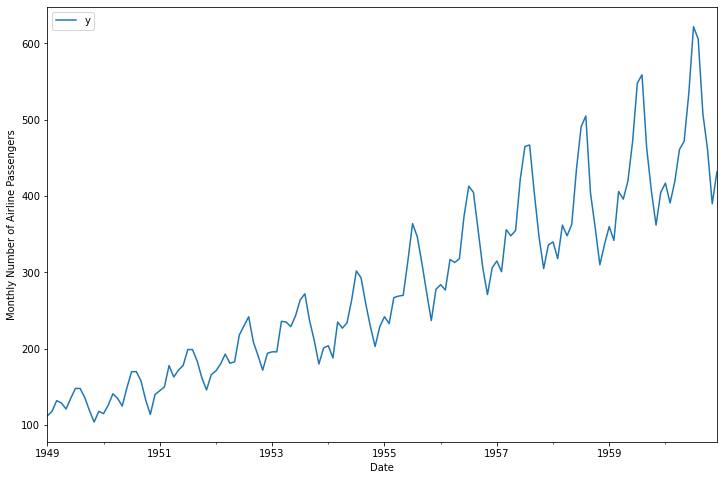

In [7]:
ax = df.set_index('ds').plot(figsize= (12, 8))
ax.set_ylabel('Monthly Number of Airline Passengers')
ax.set_xlabel('Date')

plt.show()

In [13]:
my_model = Prophet()

In [22]:
my_model.fit(df)

Exception: Prophet object can only be fit once. Instantiate a new object.

In [15]:
future_dates = my_model.make_future_dataframe(periods=36, freq='MS')
future_dates.tail()

,ds
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01
179,1963-12-01


In [16]:
forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
175,1963-08-01,650.188104,621.288173,679.050437
176,1963-09-01,602.958720,574.667444,632.349982
177,1963-10-01,566.748836,539.716440,597.104187
178,1963-11-01,534.927554,505.750952,562.298296
179,1963-12-01,564.505589,536.071785,593.900116


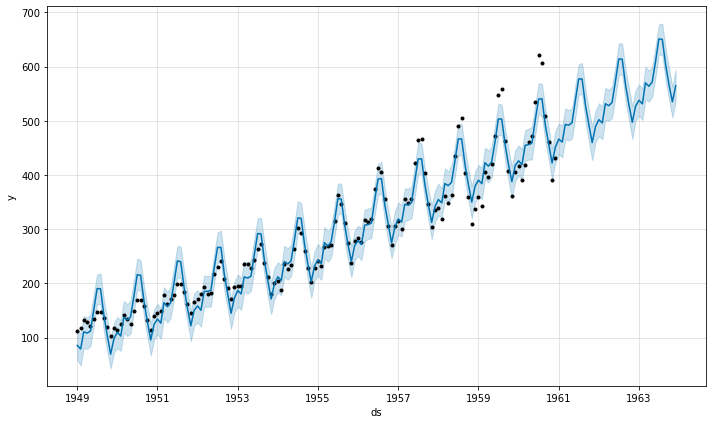

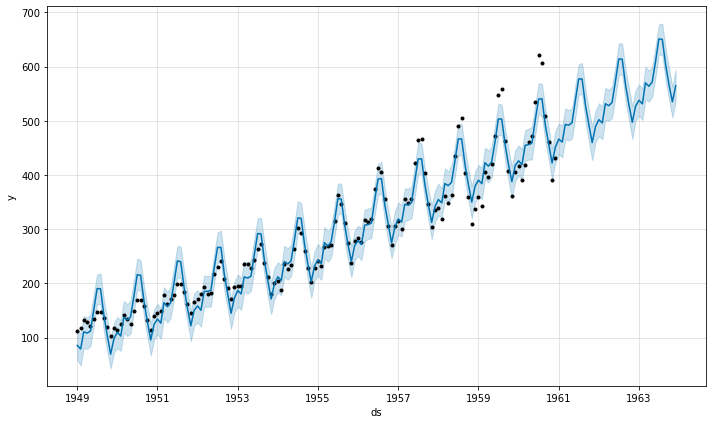

In [17]:
my_model.plot(forecast)

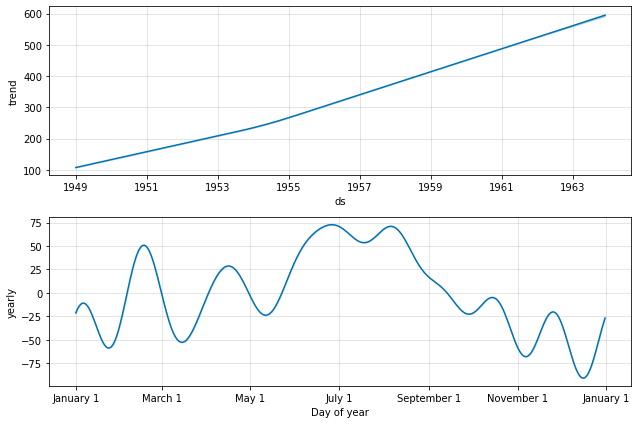

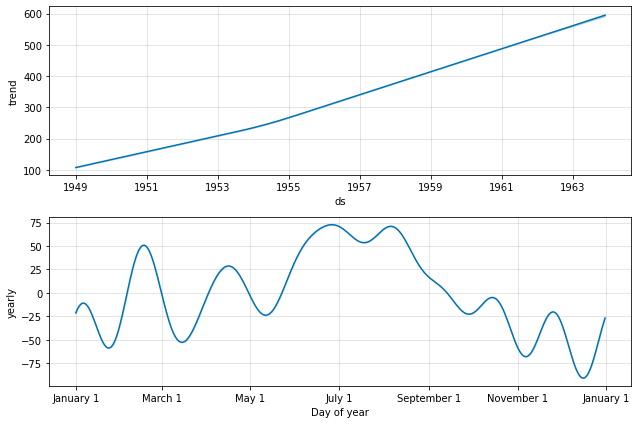

In [18]:
my_model.plot_components(forecast)